In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.linalg import solve
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Assignment 3

## Lava Flowing Down

- Constants

In [2]:
g = 9.8 # gravitational acceleration of Earth, m.s^(-2)
alpha = np.pi/6 # incline of the plane, rad
f_g = np.sin(alpha)  # gravitational force acting on a object on the incline,  m.s^(-2)
nu = 1000 # lava's viscosity, estimated in class

- Initial Parameters

In [3]:
Ngrid = 100
Nsteps = 1000
dx = 0.01
dt = 0.01
beta = nu*dt/(dx**2)

x = np.arange(0, Ngrid*dx, dx)  # creates a grid of all the points
v_0 = np.zeros_like(x) # initial velocity we assume the lava is at rest initially

A = np.eye(Ngrid)*(1.0 + 2.0 * beta) + np.eye(Ngrid, k=1)*(-beta) + np.eye(Ngrid, k=-1)*-beta

- Boundary Conditions

In [4]:
A[-1][-1] = 1 + beta

- Steady State Solution

In [5]:
H = x[-1] # boundary of lava
v_a = -(f_g/nu)* (1/2 * x**2 - H*x)

- Set up the time evolution ( following the numerical method )

In [14]:
velocities = [np.zeros_like(x) for _ in range(Nsteps)] # empty array to store the computed velocities

In [15]:
v = v_0
for ct in range(Nsteps):
    
    velocities[ct] = v
    
    # Analytic Solution for the tridiagonal matrix
    T =  v - np.ones_like(x)*f_g*dt
    v_1 = -solve(A, T)
    
    # Apply boundary conditions
    v_1[0] = 0
    
    v = v_1

I couldnt get the simulation to work so I plotted the first and last time step.

Text(0, 0.5, 'Velocity')

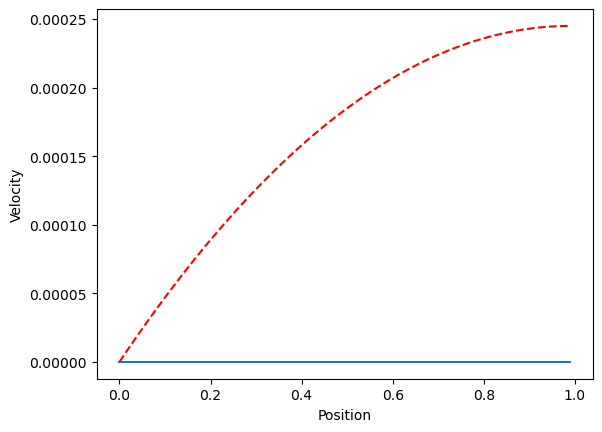

In [16]:
plt.plot(x, v_a, 'r--', label='Steady-State Solution')
plt.plot(x, velocities[0], label = 'Analytic Solution')
plt.xlabel('Position')
plt.ylabel('Velocity')

Text(0, 0.5, 'Velocity')

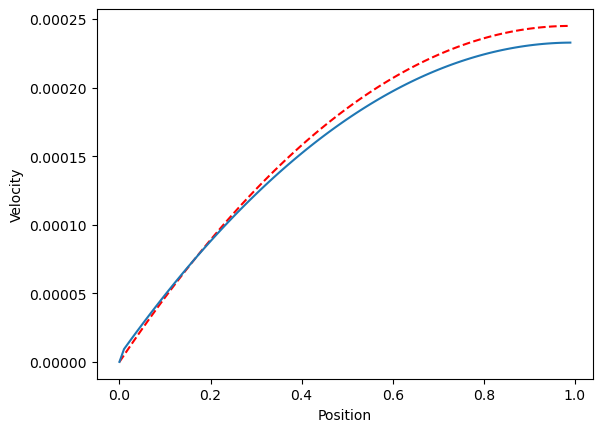

In [17]:
plt.plot(x, v_a, 'r--', label='Steady-State Solution')
plt.plot(x, velocities[999], label = 'Analytic Solution')
plt.xlabel('Position')
plt.ylabel('Velocity')